<a href="https://colab.research.google.com/github/MelqonyanG/ML_Intro/blob/master/ACA_ML_8_1_Introduction_to_NLP_and_Word_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACA ML 8.1 - Introduction to NLP and Word vectors

This notebook is part of the [Machine Learning Course](https://aca.am/en/machine-learning/) at Armenian Code Academy, and accompanies lectures slides and lectures nots for the 2-week block on NLP. It has a few practical demonstrations for word meaning and word vectors.

Created: march 21, 2021 | Last major update: March 21, 2021

Author: [Vahe Tshitoyan](https://vtshitoyan.github.io) (please reach out with any questions or suggestions)

## Old-school NLP
[WordNet - A Lexical Database for English](https://wordnet.princeton.edu/)

### WordNet Synonyms

In [ ]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
parts_of_speech = {
    'n': 'noun', 'v': 'verb', 's': 'adj (s)', 'a': 'adj', 'r': 'adv'}

def print_synonyms(w):
  for synset in wn.synsets(w):
    print(f'{parts_of_speech[synset.pos()]}:'
          f' {", ".join([l.name() for l in synset.lemmas()])}')

In [ ]:
print_synonyms('good')

noun: good
noun: good, goodness
noun: good, goodness
noun: commodity, trade_good, good
adj: good
adj (s): full, good
adj: good
adj (s): estimable, good, honorable, respectable
adj (s): beneficial, good
adj (s): good
adj (s): good, just, upright
adj (s): adept, expert, good, practiced, proficient, skillful, skilful
adj (s): good
adj (s): dear, good, near
adj (s): dependable, good, safe, secure
adj (s): good, right, ripe
adj (s): good, well
adj (s): effective, good, in_effect, in_force
adj (s): good
adj (s): good, serious
adj (s): good, sound
adj (s): good, salutary
adj (s): good, honest
adj (s): good, undecomposed, unspoiled, unspoilt
adj (s): good
adv: well, good
adv: thoroughly, soundly, good


In [ ]:
print_synonyms('armenia')

noun: Armenia, Republic_of_Armenia, Hayastan


### WordNet Hypernyms
**hypernym**: a word with a broad meaning that more specific words fall under. For example, *color* is a hypernym of *red*

In [ ]:
def get_hypernyms(w):
  word = wn.synset(f'{w}.n.01')
  hyper = lambda s: s.hypernyms()
  return list(word.closure(hyper))

In [ ]:
get_hypernyms('panda')

[Synset('procyonid.n.01'),
 Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

In [ ]:
get_hypernyms('red')

[Synset('chromatic_color.n.01'),
 Synset('color.n.01'),
 Synset('visual_property.n.01'),
 Synset('property.n.02'),
 Synset('attribute.n.02'),
 Synset('abstraction.n.06'),
 Synset('entity.n.01')]

In [ ]:
get_hypernyms('keyboard')

[Synset('device.n.01'),
 Synset('instrumentality.n.03'),
 Synset('artifact.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

## Word embeddings

Exploring pre-trained word embeddings

In [ ]:
import gensim
import gensim.downloader

In [ ]:
model_glove_wiki = gensim.downloader.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
print(f'Number of vocabulary words: {len(model_glove_wiki.vocab)}')

Number of vocabulary words: 400000


In [ ]:
w = 'chair'
print(f'Word vector for word {w}:\n {model_glove_wiki.get_vector(w)}')

Word vector for word chair:
 [ 0.0065461  0.37421    0.10797   -0.082747   0.64901    0.30169
 -0.073074   0.93806   -0.63044   -0.51392   -0.37892   -0.58334
  0.35183    1.1785     0.030233  -0.10038   -0.26562    0.23061
 -0.39409   -1.2905    -0.48042    0.24882    0.32405   -0.60272
  0.70835   -0.29148   -0.52192   -0.68477    0.32833    0.1365
 -0.1287     0.54085   -0.17068    0.20286   -0.78958    0.50968
 -0.64833    0.46491    0.50427   -0.15785   -0.54493   -0.35393
  0.66042   -0.71844   -0.48376    0.49241   -0.60408    0.53023
 -0.89401   -0.39691   -0.61351   -0.46707   -0.018895   0.50907
 -0.10905   -2.0831     0.33063    0.3548     0.98301    0.080053
  0.12678   -0.061691  -0.039855   0.33585    0.13318   -0.35239
  0.43726    0.84516    0.21468    0.30733    0.76884    0.44288
  0.74522   -0.26943   -0.6214    -0.13356   -0.53495    0.096564
  0.26305   -0.49739   -0.45149   -0.1694     0.11016   -0.31119
 -0.32883   -0.39835    0.34864   -0.24336    0.33879   -0.9

In [ ]:
words_of_interest = [
  'chair', 'table', 'desk', 'floor', 'window', 'seat', 'wall', 
  'peach', 'orange', 'banana', 'kiwi', 'grapes', 'lemon', 'pear',
  'obama', 'bush', 'nixon', 'clinton', 'trump']
top_1000_words = model_glove_wiki.index2entity[:1000]

Similar words are closer in vector space

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_pca(word_list, x_lim=None, y_lim=None, axis='off', 
             model=model_glove_wiki):
  word_vectors_of_interest = np.asarray(
      [model.wv.get_vector(w) for w in word_list])
  word_vectors_in_2d = PCA().fit_transform(word_vectors_of_interest)[:,:2]

  _, ax = plt.subplots(figsize=(8, 6))
  ax.scatter(word_vectors_in_2d[:, 0], word_vectors_in_2d[:, 1])
  for i, w in enumerate(word_list):
    ax.annotate(w, (word_vectors_in_2d[i, 0], word_vectors_in_2d[i, 1]), 
                clip_on=True)
  if x_lim is not None:
    ax.set_xlim(x_lim)
  if y_lim is not None:
    ax.set_ylim(y_lim)
  plt.axis(axis)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


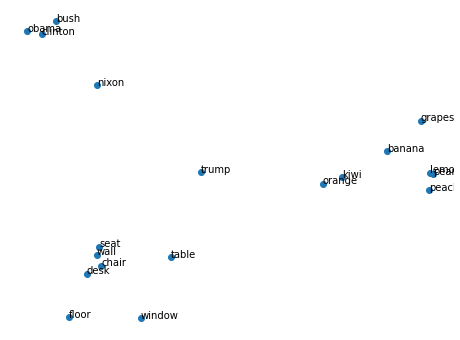

In [ ]:
plot_pca(words_of_interest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


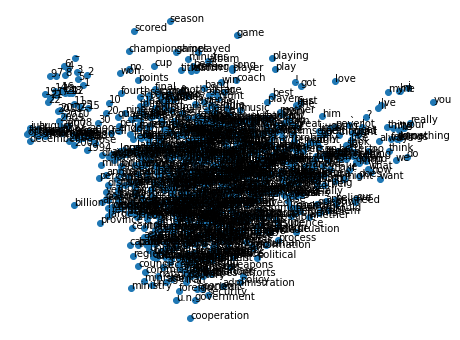

In [ ]:
plot_pca(top_1000_words)

In [ ]:
w = 'good'
print(f'Most similar words to word {w}:')
model_glove_wiki.most_similar(w,topn=10)

Most similar words to word good:


[('better', 0.893191397190094),
 ('sure', 0.8314563035964966),
 ('really', 0.8297762274742126),
 ('kind', 0.828826904296875),
 ('very', 0.8260800838470459),
 ('we', 0.8234355449676514),
 ('way', 0.8215397596359253),
 ('think', 0.8205099105834961),
 ('thing', 0.8171302080154419),
 ("'re", 0.8141680955886841)]

### Armenian word embeddings

You need to upload the model in order for this section to run. Some models can be found [here](https://drive.google.com/drive/folders/1S_bFgENkQu-sn_fJjGC8xaMehncxoqji?usp=sharing).

Number of vocabulary words: 678783


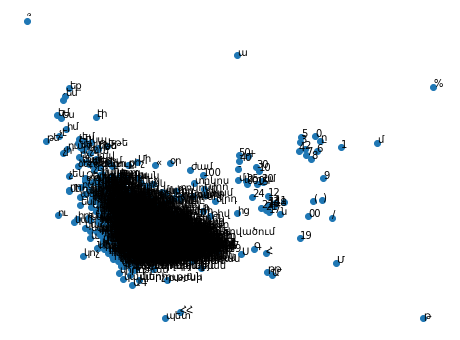

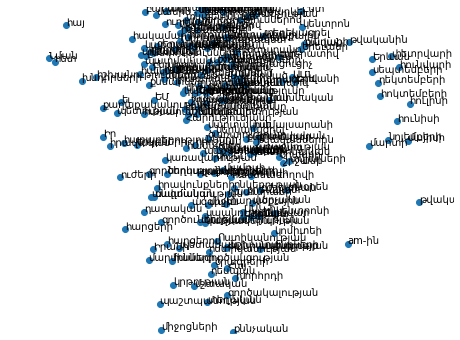

In [ ]:
import os

model_name = 'ft_50_1679k_and_wiki_lr0025_cn36_ss000001.model'
if os.path.exists(model_name):
  armenian_embeddings = gensim.models.fasttext.FastText.load(model_name)
  print(f'Number of vocabulary words: {len(armenian_embeddings.wv.vocab)}')
  top_1000_words = armenian_embeddings.wv.index2entity[:1000]
  plot_pca(top_1000_words, model=armenian_embeddings)
  plot_pca(top_1000_words, (-20, 20), (-20, -10), 
           model=armenian_embeddings)
else:
  armenian_embeddings = None
  print('You need to upload the model file first.')

In [ ]:
armenian_embeddings.wv.most_similar(positive=['դպրոց'])

[('դպրոցր', 0.9347216486930847),
 ('դպրոցոմ', 0.9304841756820679),
 ('դպրոցս', 0.927428662776947),
 ('Դպրոց', 0.9206417798995972),
 ('դպրոցը', 0.9072887301445007),
 ('գրադպրոց', 0.9066643118858337),
 ('դպրոցիս', 0.9043025970458984),
 ('դպրոցն', 0.9037590026855469),
 ('սպորտդպրոց', 0.8666008114814758),
 ('դպրոցիդ', 0.8576775193214417)]

In [ ]:
armenian_embeddings.wv.most_similar(positive=['կարմիր'])

[('Սև-կարմիր', 0.8918075561523438),
 ('կապույտ', 0.8345009088516235),
 ('արնակարմիր', 0.8093111515045166),
 ('դեղին', 0.8082975149154663),
 ('կարմիրի', 0.8051129579544067),
 ('նարնջակարմիր', 0.800564706325531),
 ('կապտակարմիր', 0.7926867604255676),
 ('շիկակարմիր', 0.7907490134239197),
 ('կարմրակապույտ', 0.7717244029045105),
 ('կարմիրն', 0.7715886235237122)]

In [ ]:
armenian_embeddings.wv.most_similar(negative=['կարմիր'])

[('Mt', 0.5067793130874634),
 ('th', 0.49410906434059143),
 ('աշխատունակ', 0.4869403839111328),
 ('Յըլ', 0.4710981845855713),
 ('Ասատր', 0.45935001969337463),
 ('Շահսենեմ', 0.45517224073410034),
 ('104-ը', 0.4510742425918579),
 ('64', 0.44867807626724243),
 ('Էթեմ', 0.4444555640220642),
 ('onto', 0.4409807026386261)]

In [ ]:
armenian_embeddings.wv.most_similar(negative=['մեծ'])

[('02', 0.5880160927772522),
 ('05', 0.5584599375724792),
 ('07', 0.5572476387023926),
 ('Էլմ', 0.5519378781318665),
 ('01', 0.5506056547164917),
 ('Ազաբ', 0.5423334240913391),
 ('04', 0.5396718382835388),
 ('զեկուցագիր', 0.5393275022506714),
 ('08', 0.5384430289268494),
 ('06', 0.5373049378395081)]

In [ ]:
def analogy(w1_is_to, w2, as_w3_is_to):
  return armenian_embeddings.wv.most_similar(
      positive=[as_w3_is_to, w2], negative=[w1_is_to])[0][0]

In [ ]:
analogy('Երևան', 'Հայաստան', 'Մոսկվա')

'Ռուսաստան'

In [ ]:
analogy('Պուտին', 'Ռուսաստան', 'Փաշինյան')

'Հայաստան'

In [ ]:
analogy('Հայաստան', 'հայ', 'ԱՄՆ')

'ամերիկացի'

In [ ]:
analogy('մեծ', 'փոքր', 'սև')

'սպիտակ'

In [ ]:
analogy('ուսուցիչ', 'դպրոց', 'դասախոս')

'պետհամալսարան'

In [ ]:
analogy('Գերմանիա', 'գարեջուր', 'Ֆրանսիա')

'շամպայն'

In [ ]:
armenian_embeddings.wv.most_similar(
      positive=['Հայաստան'], negative=['Երևան'])

[('եվրոպացիք', 0.6649690866470337),
 ('արտահ', 0.6454818844795227),
 ('հայաստանա', 0.6442304253578186),
 ('հայաստանն', 0.6366807818412781),
 ('հայաստանը', 0.6296848058700562),
 ('որՀայաստանը', 0.5973526835441589),
 ('եվրոպացի', 0.5940941572189331),
 ('Հայաստանն', 0.5940027236938477),
 ('հայաստանցիք', 0.5847570300102234),
 ('բանանն', 0.5826882719993591)]